**Capstone 2: Data Wrangling**

The National Transportation Safety Board (NTSB) has an Aviation Accident Database that contains information about civil aviation accidents and incidents that they investigate within the United States, its territories and international waters. For this Project, we will specifically be looking at airplane accidents for the 20 years from 2002 to 2021. The operations included are scheduled Part 121: Air Carrier, which includes most passenger airlines, as well as Part 135: Small Carrier for both commuter and ‘air taxi’ small aircraft. This dataset does not include aircraft accidents where the aircraft involved was amateur built.

**Data Collection**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Loading data from excel files and turning into dataframes.

In [2]:
part_121_file = 'data_raw/cases_FAR_p121/cases_FAR_p121.xlsx'
part_121 = pd.ExcelFile(part_121_file)
part_135_file = 'data_raw/cases_FAR_p135/cases_FAR_p135.xlsx'
part_135 = pd.ExcelFile(part_135_file)

In [3]:
df_p121 = part_121.parse(0)
df_p135 = part_135.parse(0)

In [4]:
#print(df_p121.head())

In [5]:
#print(df_p135.head())

Adding a category column to each file to mark if the data is part 121 or 135.

In [6]:
df_p121['FAR Part'] = '121'
df_p135['FAR Part'] = '135'

In [7]:
#checking that adding column worked properly
print(df_p135.head(2))

       NtsbNo EventType    Mkey             EventDate      City    State  \
0  ERA22LA097       ACC  104454  2021-12-29T16:22:00Z  Marathon  Florida   
1  CEN22FA081       ACC  104432  2021-12-21T09:26:00Z  Fulshear    Texas   

         Country ReportNo             N#  HasSafetyRec  ...     ReportType  \
0  United States      NaN         N1596U         False  ...  DirectorBrief   
1  United States      NaN  N1116N, UNREG         False  ...  DirectorBrief   

  OriginalPublishedDate HighestInjuryLevel FatalInjuryCount  \
0                   NaN            Serious                0   
1                   NaN              Fatal                2   

   SeriousInjuryCount  MinorInjuryCount  ProbableCause Findings  \
0                   1                 2            NaN      NaN   
1                   0                 0            NaN      NaN   

                                       DocketUrl FAR Part  
0  https://data.ntsb.gov/Docket?ProjectID=104454      135  
1  https://data.ntsb.gov

Merging the datframes.

In [8]:
#verify that they have the same column names
print(df_p121.columns)
print(df_p135.columns)

Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'ReportNo', 'N#', 'HasSafetyRec', 'Mode', 'ReportType',
       'OriginalPublishedDate', 'HighestInjuryLevel', 'FatalInjuryCount',
       'SeriousInjuryCount', 'MinorInjuryCount', 'ProbableCause', 'Findings',
       'DocketUrl', 'FAR Part'],
      dtype='object')
Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'ReportNo', 'N#', 'HasSafetyRec', 'Mode', 'ReportType',
       'OriginalPublishedDate', 'HighestInjuryLevel', 'FatalInjuryCount',
       'SeriousInjuryCount', 'MinorInjuryCount', 'ProbableCause', 'Findings',
       'DocketUrl', 'FAR Part'],
      dtype='object')


In [9]:
df_p121.columns.difference(df_p135.columns)

Index([], dtype='object')

In [10]:
df_p135.columns.difference(df_p121.columns)

Index([], dtype='object')

They both have the same column names, as expected. Now concatenating the dataframes.

In [11]:
df_flights = pd.concat([df_p121, df_p135], ignore_index = True)
df_flights = df_flights.sort_values('EventDate')
print(df_flights.head(10))
#also want to check the dataframe shape to get number of rows
print(df_flights.shape)

          NtsbNo EventType   Mkey             EventDate             City  \
1301  MIA02FA048       ACC  53983  2002-01-01T19:02:00Z        Hollywood   
1300  NYC02LA047       ACC  53991  2002-01-08T06:26:00Z        Covington   
1299  ANC02FA010       ACC  54054  2002-01-15T09:20:00Z           HAINES   
1298  ATL02WA041       ACC  54066  2002-01-18T05:00:00Z   British Virgin   
542   NYC02LA056       ACC  54107  2002-01-20T08:15:00Z           Dulles   
541   CHI02LA069       ACC  54074  2002-01-24T15:00:00Z     Indianapolis   
1297  IAD02LA027       ACC  54072  2002-01-24T20:30:00Z       Waterville   
1296  ANC02LA012       ACC  54171  2002-02-01T14:56:00Z         Ouzinkie   
1295  ANC02FA014       ACC  54172  2002-02-04T11:42:00Z           Bethel   
540   MIA02WA063       ACC  54240  2002-02-16T14:10:00Z  Paradise Island   

         State                 Country ReportNo      N#  HasSafetyRec  ...  \
1301   Florida           United States      NaN  N3525Y         False  ...   
1300  K

Seeing both FAR part numbers, and EventDate in the correct order.
The data frame has 1302 rows and 21 columns

**Data Definition**

First want to make sure the names of the columns relate to the data in them, and that the types of data in the column makes sense.

In [12]:
#again looking at columns, but this time in relation to data type it contains
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 1301 to 0
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NtsbNo                 1302 non-null   object 
 1   EventType              1302 non-null   object 
 2   Mkey                   1302 non-null   int64  
 3   EventDate              1302 non-null   object 
 4   City                   1302 non-null   object 
 5   State                  1235 non-null   object 
 6   Country                1298 non-null   object 
 7   ReportNo               29 non-null     object 
 8   N#                     1302 non-null   object 
 9   HasSafetyRec           1302 non-null   bool   
 10  Mode                   1302 non-null   object 
 11  ReportType             1302 non-null   object 
 12  OriginalPublishedDate  1212 non-null   object 
 13  HighestInjuryLevel     1298 non-null   object 
 14  FatalInjuryCount       1299 non-null   float64
 15  Seri

FAR Part should be category, and we want 'Findings' to be a string

In [13]:
#need to change the 'FAR Part' column to category
df_flights = df_flights.astype({'FAR Part':'category', 'Findings':'string'})

Already seeing an issue with this data. Specifically, the column we are most interested in is 'Findings' since those entries are structured in a specific format. Want to look into what is causing the missing values.

712


<AxesSubplot:>

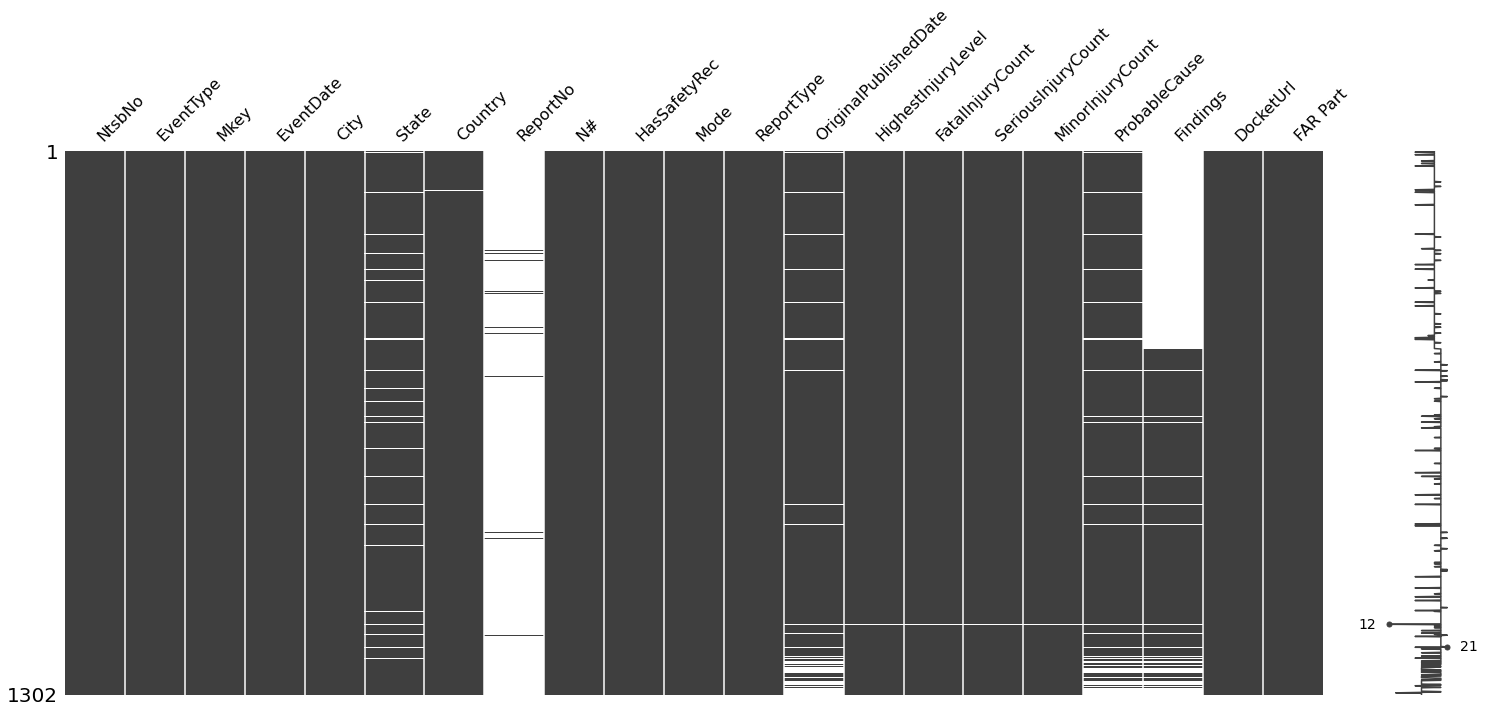

In [14]:
print(df_flights.duplicated(subset = 'Findings').sum())

#visualize missing matrix
msno.matrix(df_flights)

This dataset is sorted by date, with earlier dates at the top. Looking at the matrix, it seems that earlier accidents don't have their probable causes transfered into the Findings scructure. Taking a look at the raw excel files, the Findings column is only filled out starting 01/01/2008. Deleting data up to 2008 would still leave us with 13 years of accident findings. This would allow us to have a good amount of data without having to create a long list of search terms for the Probably Cause column which doesn't have much structure nor is required to contain key words. Working off of 'Probable Cause' vs 'Findings' would lead to possibly missing accident causes because of the use of specific techincal causes instead of a generalized Finding.

Deciding to proceed with the 'Findings' column with the loss of pre-2008 data. Will do that in the 'Data Cleaning' section below.

Looking at specific columns, Report number has very few values and the informaiton is not relevant, so the column can be deleted. Will also delete Report Type and docket url. Orginal publishing date shows us that the missing 'Findings' information for the most recent accidents cooresponds to the report not having been made yet, so I'm comfortable removing the later rows without Findings data as well. 

**Data Cleaning**

First deleting columns: 'ReportNo', 'ReportType' and 'DocketUrl'

In [15]:
df_flights.columns

Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'ReportNo', 'N#', 'HasSafetyRec', 'Mode', 'ReportType',
       'OriginalPublishedDate', 'HighestInjuryLevel', 'FatalInjuryCount',
       'SeriousInjuryCount', 'MinorInjuryCount', 'ProbableCause', 'Findings',
       'DocketUrl', 'FAR Part'],
      dtype='object')

In [16]:
df_flights = df_flights.drop(['ReportNo', 'ReportType', 'DocketUrl'], axis = 1)
df_flights.columns

Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'N#', 'HasSafetyRec', 'Mode', 'OriginalPublishedDate',
       'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount', 'ProbableCause', 'Findings', 'FAR Part'],
      dtype='object')

Findings column is missing in rows prior to 2008 and later where the reports have not yet been made. These rows will not be useful since the cause of the accident is what we are looking at. So making new dataframe without those rows, and storing the removed rows in a different dataframe just in case we need them later (doubtful).

In [17]:
df_flights_miss = df_flights[df_flights['Findings'].isna()]
df_flights = df_flights[~df_flights['Findings'].isna()]

In [18]:
#check for missing values
print(df_flights['Findings'].isna().any())

False


In [19]:
#seeing shape of dataframe now
print(df_flights.shape)

(753, 18)


753 rows is exactly what was expected.
Now going to make sure we have all unique entries. 'NtsbNo' column contains the unique NTSB case number for each accident. Verify that each row is unique.

In [20]:
print(df_flights.duplicated(subset = 'NtsbNo').sum())

0


Perfect, all row entries are unique.

Now turning attention specifically to the 'Findings' column.

In [21]:
df_flights['Findings'].head()

1020    Aircraft - Aircraft structures - Doors - Cargo...
349     Personnel issues - Psychological - Attention/m...
348     Environmental issues - Conditions/weather/phen...
1019    Personnel issues - Psychological - Perception/...
1018    Environmental issues - Physical environment - ...
Name: Findings, dtype: string

The findings column is structured in a specific way, take the first row: 1020    Aircraft - Aircraft structures - Doors - Cargo. The overall area of issue was Aircraft specific, then more detail with 'Aircraft structures' then which structure, 'Doors', 'Cargo'. There is also the possibility of cascading or multiple findings, such as an Environmental Issue could then lead to a Personnel issue, and these are separated by commas. In this project, we're specifically looking at the root cause of the accident, not the cascading failure after. This means we want only the first Finding, not any that follow it. 

To do this I first have to split the strings in the Findings column into a list. The delimiter is a comma. Since we only care about the first Finding, we only have to separate at the first comma, not any of the ones after.

In [22]:
df_findings_all = df_flights['Findings'].str.split(',', n = 1, expand = True)

In [23]:
df_findings_all.head()

,0,1
1020,Aircraft - Aircraft structures - Doors - Cargo...,Personnel issues - Task performance - Mainten...
349,Personnel issues - Psychological - Attention/m...,Aircraft - Aircraft power plant - Power plant...
348,Environmental issues - Conditions/weather/phen...,Environmental issues - Physical environment -...
1019,Personnel issues - Psychological - Perception/...,Environmental issues - Task environment - Pre...
1018,Environmental issues - Physical environment - ...,Personnel issues - Action/decision - Info pro...


In [24]:
df_flights['Findings_main'] = df_findings_all[0]
df_flights['Findings_supp'] = df_findings_all[1]
df_flights.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,Mode,OriginalPublishedDate,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,Findings,FAR Part,Findings_main,Findings_supp
1020,ANC08MA038,ACC,67341,2008-01-05T13:43:00Z,Kodiak,Alaska,United States,N509FN,False,Aviation,2009-04-15T04:00:00Z,Fatal,6.0,3.0,1.0,The failure of company maintenance personnel t...,Aircraft - Aircraft structures - Doors - Cargo...,135,Aircraft - Aircraft structures - Doors - Cargo...,Personnel issues - Task performance - Mainten...
349,CHI08LA071,ACC,67425,2008-01-09T07:49:00Z,Detroit,Michigan,United States,N349NB,False,Aviation,2008-05-28T04:00:00Z,None,0.0,0.0,0.0,The separation of the engine cowling which res...,Personnel issues - Psychological - Attention/m...,121,Personnel issues - Psychological - Attention/m...,Aircraft - Aircraft power plant - Power plant...
348,SEA08LA061,ACC,67369,2008-01-13T19:29:00Z,San Francisco,California,United States,"N705SK, N508UA",False,Aviation,2008-08-28T04:00:00Z,None,0.0,0.0,0.0,The company tug operator of the other airplane...,Environmental issues - Conditions/weather/phen...,121,Environmental issues - Conditions/weather/phen...,Environmental issues - Physical environment -...
1019,SEA08FA062,ACC,67390,2008-01-14T05:08:00Z,Lihue,Hawaii,United States,N410UB,False,Aviation,2009-05-06T04:00:00Z,Fatal,1.0,0.0,0.0,The pilot's spatial disorientation and loss of...,Personnel issues - Psychological - Perception/...,135,Personnel issues - Psychological - Perception/...,Environmental issues - Task environment - Pre...
1018,ANC08LA031,ACC,67395,2008-01-15T14:39:00Z,Bethel,Alaska,United States,N454SF,False,Aviation,2008-08-28T04:00:00Z,Minor,0.0,0.0,1.0,The pilot's selection of unsuitable terrain fo...,Environmental issues - Physical environment - ...,135,Environmental issues - Physical environment - ...,Personnel issues - Action/decision - Info pro...


Can now delete the original 'Findings' column.

In [25]:
df_flights = df_flights.drop(['Findings'], axis = 1)

In [26]:
df_flights.columns

Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'N#', 'HasSafetyRec', 'Mode', 'OriginalPublishedDate',
       'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount', 'ProbableCause', 'FAR Part', 'Findings_main',
       'Findings_supp'],
      dtype='object')

In [27]:
unique_find = df_flights['Findings_main'].unique()
print(unique_find)

<StringArray>
[                                   'Aircraft - Aircraft structures - Doors - Cargo/baggage doors - Incorrect service/maintenance',
                                     'Personnel issues - Psychological - Attention/monitoring - Attention - Maintenance personnel',
                                    'Environmental issues - Conditions/weather/phenomena - Light condition - Dark - Not specified',
                             'Personnel issues - Psychological - Perception/orientation/illusion - Spatial disorientation - Pilot',
 'Environmental issues - Physical environment - Runway/land/takeoff/taxi surface - Snow/slush/ice covered surface - Not specified',
                                            'Aircraft - Aircraft systems - Vacuum system - Vacuum indicating system - Malfunction',
                                                      'Personnel issues - Action/decision - Action - Lack of action - Ground crew',
                         'Environmental issues - Conditions/we

The Main Findings column still has a lot of variation (318 different entries). This is most likely because the details can get down to specifics such as which specific door has the mechanical issue. Or a specific issue with a pilot vs a generic 'personnel issue'. We're going to have to split the column further.

In [28]:
df_findings_main = df_flights['Findings_main'].str.split('-', expand = True)
df_findings_main.head()

,0,1,2,3,4,5
1020,Aircraft,Aircraft structures,Doors,Cargo/baggage doors,Incorrect service/maintenance,<NA>
349,Personnel issues,Psychological,Attention/monitoring,Attention,Maintenance personnel,<NA>
348,Environmental issues,Conditions/weather/phenomena,Light condition,Dark,Not specified,<NA>
1019,Personnel issues,Psychological,Perception/orientation/illusion,Spatial disorientation,Pilot,<NA>
1018,Environmental issues,Physical environment,Runway/land/takeoff/taxi surface,Snow/slush/ice covered surface,Not specified,<NA>


In [29]:
df_flights['Findings_main1'] = df_findings_main[0]
df_flights['Findings_main2'] = df_findings_main[1]
df_flights['Findings_main3'] = df_findings_main[2]
df_flights['Findings_main4'] = df_findings_main[3]
df_flights['Findings_main5'] = df_findings_main[4]
df_flights['Findings_main6'] = df_findings_main[5]

In [30]:
df_flights.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,Mode,...,ProbableCause,FAR Part,Findings_main,Findings_supp,Findings_main1,Findings_main2,Findings_main3,Findings_main4,Findings_main5,Findings_main6
1020,ANC08MA038,ACC,67341,2008-01-05T13:43:00Z,Kodiak,Alaska,United States,N509FN,False,Aviation,...,The failure of company maintenance personnel t...,135,Aircraft - Aircraft structures - Doors - Cargo...,Personnel issues - Task performance - Mainten...,Aircraft,Aircraft structures,Doors,Cargo/baggage doors,Incorrect service/maintenance,<NA>
349,CHI08LA071,ACC,67425,2008-01-09T07:49:00Z,Detroit,Michigan,United States,N349NB,False,Aviation,...,The separation of the engine cowling which res...,121,Personnel issues - Psychological - Attention/m...,Aircraft - Aircraft power plant - Power plant...,Personnel issues,Psychological,Attention/monitoring,Attention,Maintenance personnel,<NA>
348,SEA08LA061,ACC,67369,2008-01-13T19:29:00Z,San Francisco,California,United States,"N705SK, N508UA",False,Aviation,...,The company tug operator of the other airplane...,121,Environmental issues - Conditions/weather/phen...,Environmental issues - Physical environment -...,Environmental issues,Conditions/weather/phenomena,Light condition,Dark,Not specified,<NA>
1019,SEA08FA062,ACC,67390,2008-01-14T05:08:00Z,Lihue,Hawaii,United States,N410UB,False,Aviation,...,The pilot's spatial disorientation and loss of...,135,Personnel issues - Psychological - Perception/...,Environmental issues - Task environment - Pre...,Personnel issues,Psychological,Perception/orientation/illusion,Spatial disorientation,Pilot,<NA>
1018,ANC08LA031,ACC,67395,2008-01-15T14:39:00Z,Bethel,Alaska,United States,N454SF,False,Aviation,...,The pilot's selection of unsuitable terrain fo...,135,Environmental issues - Physical environment - ...,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Runway/land/takeoff/taxi surface,Snow/slush/ice covered surface,Not specified,<NA>


In [31]:
#now to drop the Findings_main column
df_flights = df_flights.drop(['Findings_main'], axis = 1)

In [32]:
unique_findings = df_flights['Findings_main1'].unique()
print(unique_findings)

<StringArray>
[             'Aircraft ',      'Personnel issues ',  'Environmental issues ',
        'Not determined ', 'Organizational issues ']
Length: 5, dtype: string


Yes! We now have the 5 main categories of Accident Causes. This will help determine what causes the majority of aircraft accidents.

**Looking at Numbers**

Most of the data is text, but a few of the columns have numbers that we may be interested in in the future. Going to calculate summary stats for these columns.

In [33]:
df_flights.FatalInjuryCount.describe()

count    752.000000
mean       0.333777
std        2.092795
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       50.000000
Name: FatalInjuryCount, dtype: float64

In [34]:
df_flights.SeriousInjuryCount.describe()

count    752.000000
mean       0.437500
std        0.881125
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        9.000000
Name: SeriousInjuryCount, dtype: float64

In [35]:
df_flights.MinorInjuryCount.describe()

count    752.000000
mean       0.872340
std        5.229455
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      125.000000
Name: MinorInjuryCount, dtype: float64

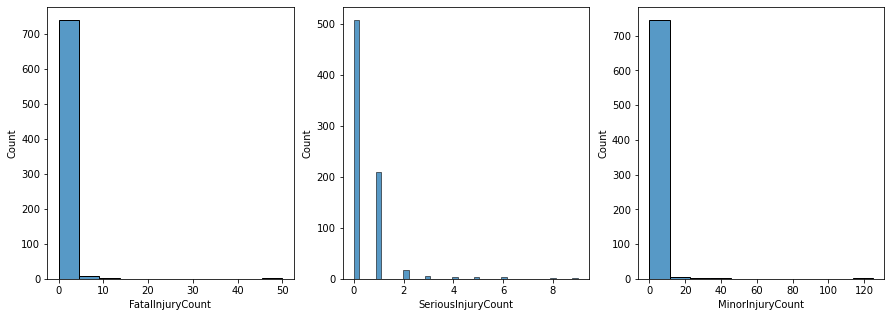

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(ax=axes[0], x = df_flights.FatalInjuryCount)
sns.histplot(ax=axes[1], x = df_flights.SeriousInjuryCount)
sns.histplot(ax=axes[2], x = df_flights.MinorInjuryCount)
plt.show()

Looks like serious injury has the least amount of deviation. Both Fatal Injury and Minor Injury have an outlier variable, but this could be from a more extreme accident with a larger plane than the other accidents.

**Saving the dataframe to a new excel file for future steps**

In [37]:
df_flights.to_excel('data/flights_cleaned.xlsx', index = False)

**Final Thoughts**  I'm pretty sure I could have deleted more columns than I did, but I'm leaning towards the more cautious side of things rather than deleting a bunch of data. This project is dealing with a lot of text, the only numbers that will most likely be used is number of injuries (Fatal/Serious/Minor Injury count columns), which can be used later to determine which types of accidents cause the most harm to passengers/crew.